<a href="https://colab.research.google.com/github/ekanshsinghrathore/eda_playstore/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# Calling in Data

In [116]:
# importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
googleplay_df = pd.read_csv('/content/drive/MyDrive/Play Store Data.csv') #loading play store data.csv as googleplay_df

In [5]:
googleplay_df.head() #checking columns

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
userreview_df=pd.read_csv('/content/drive/MyDrive/User Reviews.csv') #loading user review.csv as userreview_df

In [7]:
userreview_df.head() #checking columns

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [8]:
googleplay_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
userreview_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [10]:
#more information about the dataset
googleplay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
#display the sum of the null values for each columns (null values are those values which doesnot contain any entry)
googleplay_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [19]:
# Replacing spaces in columns name with '_'
googleplay_df.rename(columns=lambda x: x. replace(' ', '_'), inplace=True)

In [21]:
googleplay_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Finding out top famous catergories in playstore

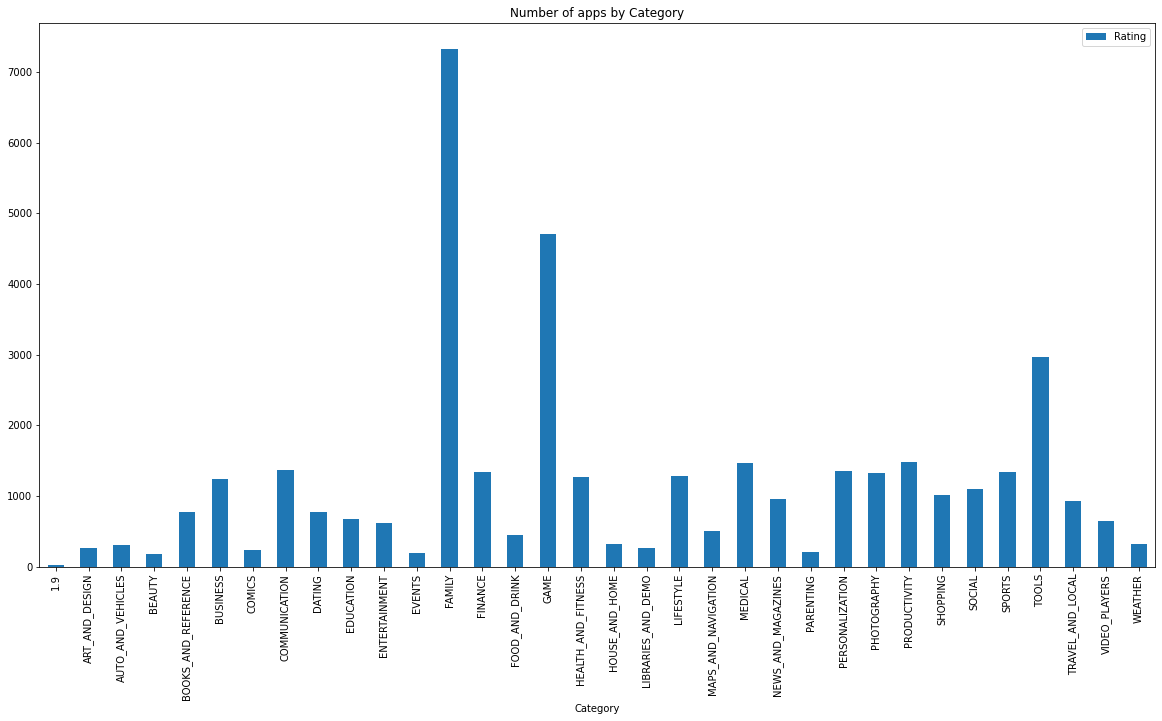

In [23]:
# Plotting bar graph with the help of matplotlib library
googleplay_df.groupby('Category').sum().plot.bar(figsize=(20,10))
plt.title("Number of apps by Category");

As we can see from the upper graph that family and games are the most popular categories among play store users. We can conclude that family category applications have lot of scope in the market as compared to other ones.

# Which application type (free/paid) is the highest

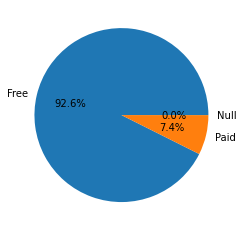

In [60]:
x= googleplay_df.Type.value_counts()
mylabel= ['Free','Paid','Null']
plt.pie(x,labels=mylabel,autopct= "%1.1f%%")
plt.show()

As we can see from the upper pie chart is that free applications consist of a major portion of Google Play store and paid applications are significantly less as compared to paid applications. We can also conclude that developers are most dependent on post-business instead of pre-business taking money up front.

# Highest Content Rating Category

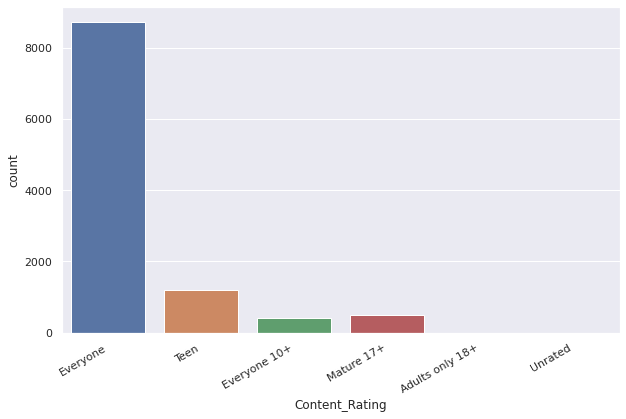

In [90]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1)
sns.countplot(x = "Content_Rating",data = googleplay_df)
plt.xticks(
    rotation=30,
    horizontalalignment='right');


As we can see from the above count plot 'Everyone' Category is the widely set of content rules followed by developers making playstore age-friendly. Most of the applications can be accessed by every age group.

# Size of the applications by box plot

In [95]:
googleplay_df['Size']=googleplay_df['Size'].str.replace('M','')
googleplay_df['Size']=googleplay_df['Size'].str.replace('k','')

In [96]:
googleplay_df.drop(googleplay_df[googleplay_df['Size'] == '1,000+'].index, inplace=True)

In [100]:
googleplay_df.drop(googleplay_df[googleplay_df['Size'] == 'Varies with device'].index, inplace=True)

In [101]:
googleplay_df.Size=googleplay_df.Size.astype('float')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


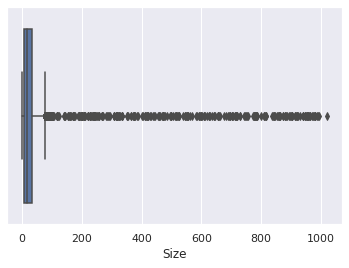

In [109]:
sns.boxplot(googleplay_df['Size'])
plt.show()

As we can see from the box plot, more than half of applications have sizes around 1 MB or 2 MB but there are also many applications which are maximum outliers, or we can say exceptions in the playstore size pattern. Developers have to keep in mind that application size should not be more than the internal quartile range.

In [114]:
googleplay_df['Installs'].describe()

count           9145
unique            20
top       1,000,000+
freq            1303
Name: Installs, dtype: object

In [121]:
googleplay_df.Size=googleplay_df.Size.astype('float')

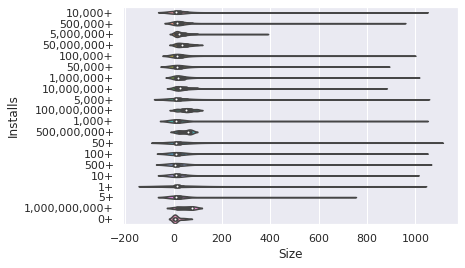

In [126]:

sns.violinplot(x = googleplay_df['Size'], 
                  y = googleplay_df['Installs'] )